# analysis

In [79]:
from ast import literal_eval

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [80]:
df = pd.read_csv('../data/processed.csv')

df = df[df['rating'].notnull()].set_index('steam_appid').sort_values('name')

df

,_date_pulled,name,release_date,recent_count,recent_percent,all_count,all_percent,short_desc,long_desc,reviews_text,...,feat_norm_all_count,feat_norm_all_percent,feat_norm_recent_count_log,feat_norm_recent_percent_log,feat_norm_all_count_log,feat_norm_all_percent_log,feat_norm_recent_count_pow,feat_norm_recent_percent_pow,feat_norm_all_count_pow,feat_norm_all_percent_pow
steam_appid,,,,,,,,,,,,,,,,,,,,,
1222700,2021-11-22,A Way Out,2018-03-23,775,85,14517,87,A Way Out is an exclusively co-op adventure wh...,A Way Out is an exclusively co-op adventure wh...,What was promised was a prison breakout with ...,...,-0.109012,0.047925,0.684014,-0.070756,0.505538,0.095257,-0.104101,-0.240877,-0.042686,-0.006020
361420,2021-11-22,ASTRONEER,2016-12-16,722,94,70715,91,A game of aerospace industry and interplanetar...,A game of aerospace industry and interplanetar...,"Before 1.0 comes out, I wanted to recommend ...",...,0.136442,0.479255,0.644139,0.627784,1.274032,0.442310,-0.104380,0.759993,-0.038879,0.483137
761890,2021-11-22,Albion Online,2017-07-17,980,81,41555,79,Albion Online is a fantasy sandbox MMORPG feat...,Albion Online is a fantasy sandbox MMORPG feat...,I'm going to recommend this game but I'm doin...,...,0.009081,-0.814733,0.816122,-0.405315,1.015993,-0.649477,-0.102836,-0.653402,-0.041481,-0.918380
945360,2021-11-22,Among Us,2018-11-16,8423,82,519462,92,An online and local party game of teamwork and...,An online and local party game of teamwork and...,get friend gift friend game play game argue ...,...,2.096421,0.587087,2.027026,-0.320151,2.241912,0.526689,0.143276,-0.552135,0.171621,0.608861
1172470,2021-11-22,Apex Legends™,2020-11-04,16389,84,343968,86,"Apex Legends is the award-winning, free-to-pla...","Apex Legends is the award-winning, free-to-pla...",doesnt launch with origin edit: easy anti-che...,...,1.329921,-0.059907,2.401721,-0.152896,2.041823,0.006000,0.838333,-0.345872,0.051185,-0.124874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892970,2021-11-25,Valheim,2021-02-02,15779,97,256456,95,A brutal exploration and survival game for 1-1...,A brutal exploration and survival game for 1-1...,I wanted to wait until I had 100 hours into ...,...,0.947698,0.910584,2.380369,0.845836,1.899325,0.774431,0.769329,1.115983,0.009421,0.994278
236390,2021-11-25,War Thunder,2013-08-15,7422,73,260584,79,War Thunder is the most comprehensive free-to-...,War Thunder is the most comprehensive free-to-...,Playing this game is like committing to a lon...,...,0.965727,-0.814733,1.955808,-1.127081,1.907075,-0.649477,0.087500,-1.418811,0.011118,-0.918380
230410,2021-11-25,Warframe,2013-03-25,4802,89,453520,91,Warframe is a cooperative free-to-play third p...,Warframe is a cooperative free-to-play third p...,It's hard to write a proper review for this ...,...,1.808408,0.479255,1.710710,0.248414,2.176022,0.442310,-0.025124,0.191529,0.120625,0.483137


In [81]:
### Regression Analysis

cols = [col for col in df.columns if 'feat' in col]

X = df[cols]
y = df['rating']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

weights_sorted = sorted(results.params.items(), key=lambda x: x[1], reverse=True)

#results.summary()

/home/mcminnra/miniconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [82]:
# Top 25
for col, weight in weights_sorted[:25]:
    print(f'{col}: {weight}')

const: 1.2268953493079904
feat_tags_Story_Rich: 0.9983269231696228
feat_tags_Tactical_RPG: 0.9552078801702591
feat_tags_Replay_Value: 0.827512218733468
feat_tags_Action_RPG: 0.7138372823115784
feat_tags_Action: 0.7067135394559841
feat_tags_Shooter: 0.6783296677305719
feat_tags_Automation: 0.6481722445872617
feat_tags_Space: 0.638453777282521
feat_tags_Base_Building: 0.5830025169183475
feat_tags_Horror: 0.5820902534900427
feat_tags_Puzzle: 0.5799224468342639
feat_tags_Lore_Rich: 0.5741999420082768
feat_tags_Competitive: 0.5327878085904695
feat_tags_Singleplayer: 0.5179832003948558
feat_tags_Strategy_RPG: 0.4963986427443562
feat_tags_Character_Customization: 0.4804501984369539
feat_tags_Management: 0.4761381570031403
feat_tags_Casual: 0.4449897343538767
feat_tags_2D: 0.4424722621907349
feat_tags_Isometric: 0.4232997683878933
feat_tags_Strategy: 0.41729663377540205
feat_tags_Mature: 0.4135905200861615
feat_tags_Dark_Fantasy: 0.40587645889978935
feat_tags_Platformer: 0.3868827014626953


In [83]:
# Bottom 25
for col, weight in weights_sorted[-25:]:
    print(f'{col}: {weight}')

feat_tags_Military: -0.2644535506632106
feat_tags_Flight: -0.2713360526516244
feat_tags_Magic: -0.2788615313245272
feat_tags_Colorful: -0.2827077055129278
feat_tags_Psychological_Horror: -0.289601934010963
feat_tags_Colony_Sim: -0.29096056205354137
feat_tags_Investigation: -0.29195204280964027
feat_tags_World_War_II: -0.2950212848917737
feat_tags_VR: -0.3100632285477055
feat_tags_Stealth: -0.3324006583102424
feat_tags_Touch_Friendly: -0.33425216509655403
feat_tags_Loot: -0.34568453548278444
feat_tags_3D: -0.3511653430218536
feat_tags_Massively_Multiplayer: -0.3542972633691992
feat_tags_Atmospheric: -0.3548443691498667
feat_tags_Dungeon_Crawler: -0.38343110105769984
feat_tags_Futuristic: -0.4529848810159134
feat_tags_Robots: -0.4580555088886549
feat_tags_Music: -0.4639013431619104
feat_tags_Ninja: -0.47962182661401886
feat_tags_Relaxing: -0.5444437764177779
feat_tags_Aliens: -0.5934823203920974
feat_tags_Games_Workshop: -0.685319391086167
feat_tags_Point_and_Click: -0.7139494680750231
f

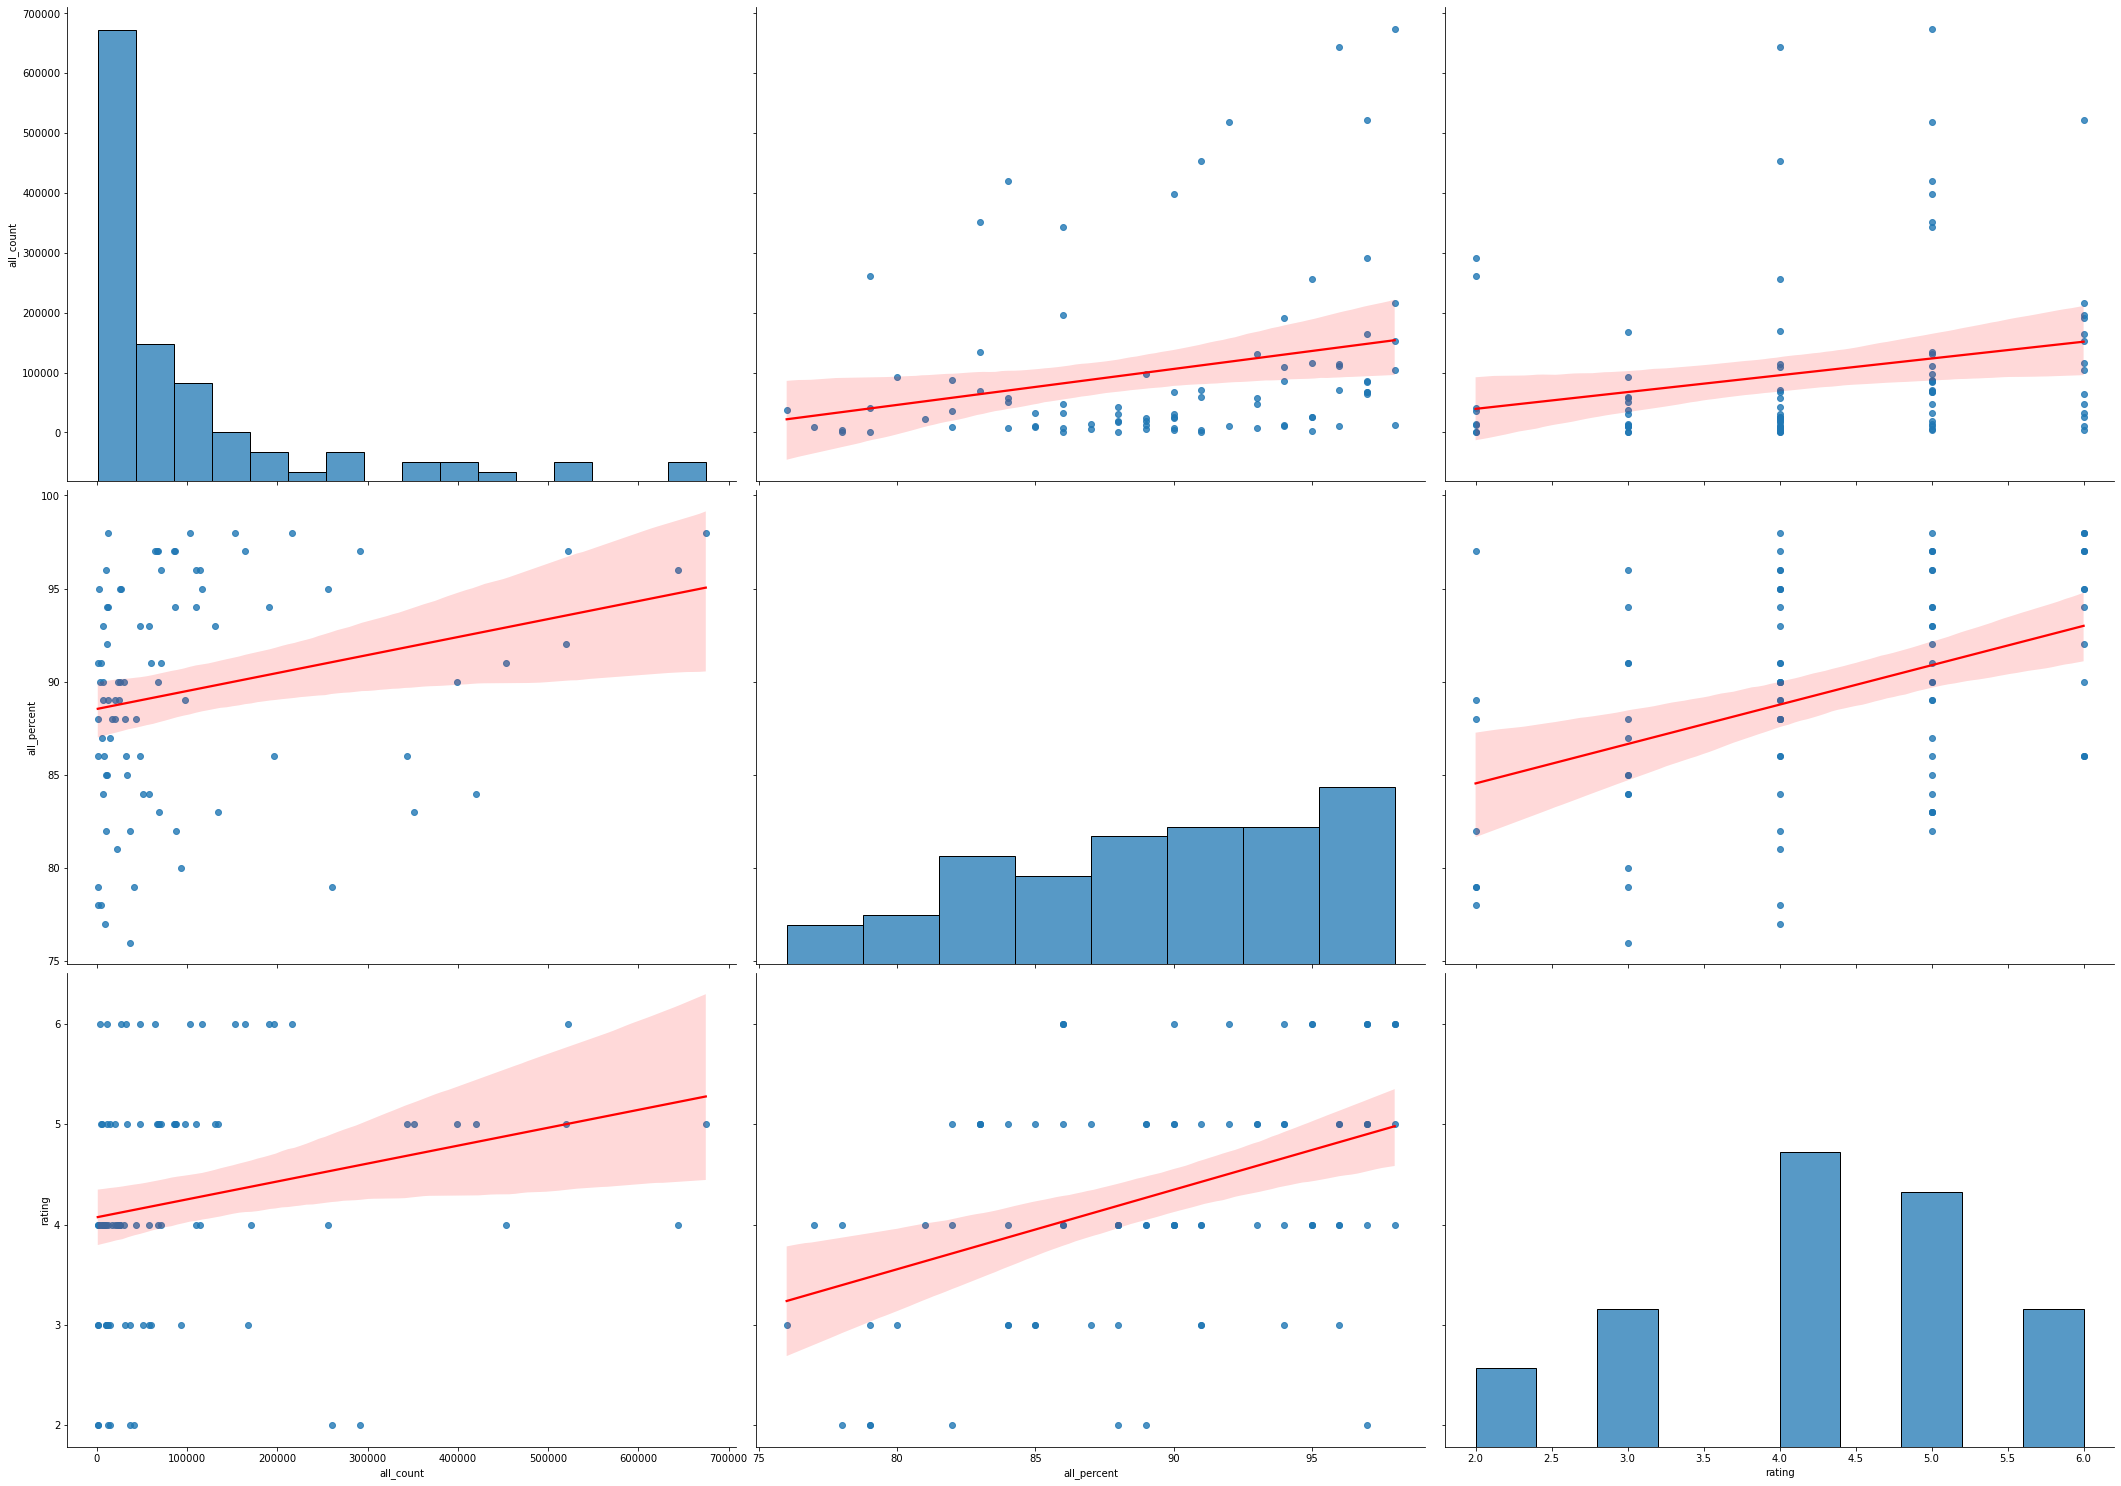

In [84]:
df_chart = df[['all_count', 'all_percent', 'rating']]

df_chart = df_chart[np.abs(df_chart-df_chart.mean()) <= (2*df_chart.std())]

sns.pairplot(df_chart, kind="reg", plot_kws={'line_kws':{'color':'red'}}, height=7, aspect=10/7)